<a href="https://colab.research.google.com/github/ClaireChiang91/ad-hoc/blob/main/Kaggle_PCA_Clustering_in_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal**:<br>
This is to practice clustering method(major for   PCA) and use Kaggle Mall Customer Segmentation Data.<br>
**Reference**: 
Kaggle dataset: [link](https://www.kaggle.com/shwetabh123/mall-customers)

In [32]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 
import seaborn as sns 
# Scaling
from sklearn.preprocessing import StandardScaler
# Dimensional
from sklearn.decomposition import PCA
# Clustering
from sklearn.cluster import KMeans

In [33]:
from google.colab import drive
drive.mount('/content/gdrive')
#data=pd.read_csv('./gdrive/My Drive/Mall_Customers.csv',usecols=[0,1],encoding="latin")
MallCustomers=pd.read_csv('./gdrive/My Drive/Mall_Customers.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [34]:
MallCustomers.shape

(200, 5)

In [35]:
MallCustomers.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [36]:
MallCustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [37]:
MallCustomers.rename(columns={'Genre':'Gender'},inplace=True)

In [38]:
MallCustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [39]:
MallCustomers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [40]:
#check missing
MallCustomers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [41]:
#drop customer ID
MallCustomers.drop(labels='CustomerID', axis=1, inplace=True)

In [42]:
MallCustomers.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [43]:
MallCustomers['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [44]:
#replace Female/Male into 0/1
MallCustomers['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [45]:
MallCustomers['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

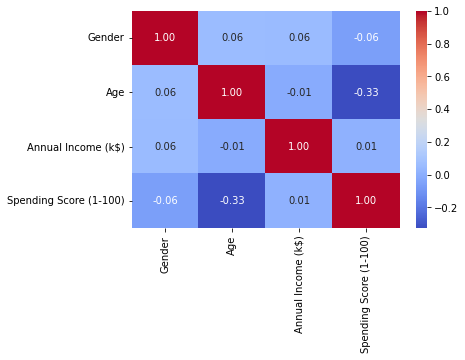

In [46]:
#heatmap: to see correlation between features
sns.heatmap(data=MallCustomers.corr(),annot=True,fmt='.2f',cmap='coolwarm')

In [47]:
sc = StandardScaler()
MallCustomers_scaled = sc.fit_transform(MallCustomers)

In [48]:
#Using PCA method to downsize the number of features from four to two
pca = PCA(n_components = 2)
MallCustomers_pca = pca.fit_transform(MallCustomers_scaled)
print("data shape after PCA :",MallCustomers_pca.shape)

data shape after PCA : (200, 2)


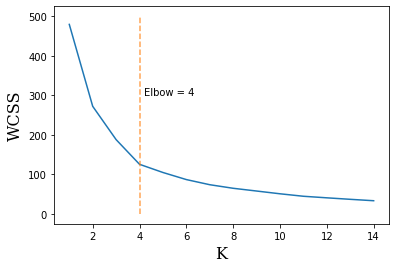

In [49]:
#using Elbow method to find the number of clusters
wcss_list = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i , init = 'k-means++'  , random_state = 1)
    kmeans.fit(MallCustomers_pca) 
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1,15) , wcss_list)
plt.plot([4,4] , [0 , 500] , linestyle = '--' , alpha = 0.7)
plt.text(4.2 , 300 , 'Elbow = 4')
plt.xlabel('K' , fontdict = plt_font)
plt.ylabel('WCSS' , fontdict = plt_font)
plt.show()

In [50]:
#from the above, the final number of clusters is four
kmeans = KMeans(n_clusters = 4 , init = 'k-means++'  , random_state = 1)
kmeans.fit(MallCustomers_pca)
cluster_id = kmeans.predict(MallCustomers_pca)

In [51]:
result_data = pd.DataFrame()
result_data['PC1'] = MallCustomers_pca[:,0]
result_data['PC2'] = MallCustomers_pca[:,1]
result_data['ClusterID'] = cluster_id

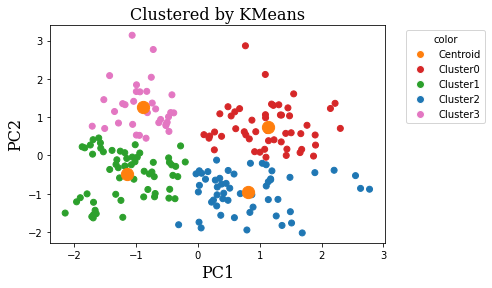

In [52]:
plt_font = {'family':'serif' , 'size':16}
cluster_colors = {0:'tab:red' , 1:'tab:green' , 2:'tab:blue' , 3:'tab:pink'}
cluster_dict = {'Centroid':'tab:orange','Cluster0':'tab:red' , 'Cluster1':'tab:green'
                , 'Cluster2':'tab:blue' , 'Cluster3':'tab:pink'}


plt.scatter(x = result_data['PC1'] , y = result_data['PC2'] 
                , c = result_data['ClusterID'].map(cluster_colors))
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in cluster_dict.items()]
plt.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.scatter(x = kmeans.cluster_centers_[:,0] , y = kmeans.cluster_centers_[:,1] , marker = 'o' , c = 'tab:orange'
            , s = 150 , alpha = 1)

plt.title("Clustered by KMeans" , fontdict = plt_font)
plt.xlabel("PC1" , fontdict = plt_font)
plt.ylabel("PC2" , fontdict = plt_font)

plt.show()